We test out the LightGraph package, to see how easy it is to use with ours, and to compare its speed.  It is easy to make a LightGraphs data type.  You just put in the adjacency matrix.  Since this also works for directed graphs, it could be nice to use their directed graph routines.  Their connected components seems slower, but their dijkstra is often faster!

In [1]:
using Laplacians
using LightGraphs

In [21]:
a = grid2(1000) # Laplacians style graph
lg = Graph(a)   # LightGraphs style

{1000000, 1998000} undirected graph

In [22]:
@time is_connected(lg)

true

0.450431 seconds (44 allocations: 31.890 MB)


In [23]:
@time isConnected(a)

true

0.142486 seconds (8 allocations: 15.259 MB)


Let's subsample, and test out the speed of connected components routines.

In [24]:
as = subsampleEdges(a,0.5);
lgs = Graph(as)

{1000000, 998947} undirected graph

In [27]:
@time c = components(as);

  0.061239 seconds (8 allocations: 15.259 MB)


In [28]:
@time lgc = connected_components(lgs);

  0.437358 seconds (572.18 k allocations: 73.131 MB)


Let's check if they give the same answers.

In [29]:
vecToComps(c)

98859-element Array{Array{Int64,1},1}:
 [1]                                                                                              
 [2,1001,1002,2001,2002,3001]                                                                     
 [3,4,1004]                                                                                       
 [5]                                                                                              
 [6]                                                                                              
 [7]                                                                                              
 [8,1008,1009]                                                                                    
 [9]                                                                                              
 [10]                                                                                             
 [11,12,13,14,15,16,17,18,23,1003  …  13024,13025,13026,13027,13028,13

In [30]:
lgc

98859-element Array{Array{Int64,1},1}:
 [1]                                                                                              
 [2,1001,1002,2001,2002,3001]                                                                     
 [3,4,1004]                                                                                       
 [5]                                                                                              
 [6]                                                                                              
 [7]                                                                                              
 [8,1008,1009]                                                                                    
 [9]                                                                                              
 [10]                                                                                             
 [11,12,13,14,15,16,17,18,23,1003  …  13024,13025,13026,13027,13028,13

To be sure that we are not being unfair in running time, let's time the vecToComps, too.

In [31]:
@time v = vecToComps(c);

  0.032858 seconds (98.90 k allocations: 16.559 MB)


### Testing Shortest Paths Code

In [105]:
nexp = 100
tLap = zeros(nexp)
tLG = zeros(nexp)
tLapW = zeros(nexp)
tLGW = zeros(nexp)

100-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [106]:
for i in 1:nexp
    a = chimera(1000000,i)
    tic()
    len, pa =  shortestPaths(a,100);
    t = toq()
    tLap[i] = t
    println("graph $i : time $t")
end


graph 1 : time 0.157275335
graph 2 : time 0.928855287
graph 3 : time 0.628510434
graph 4 : time 0.741046117
graph 5 : time 0.562501868
graph 6 : time 1.771566966
graph 7 : time 2.281707172
graph 8 : time 1.25713479
graph 9 : time 2.443579607
graph 10 : time 0.787615754
graph 11 : time 0.38503731
graph 12 : time 0.85096395
graph 13 : time 2.092245319
graph 14 : time 0.934313049
graph 15 : time 2.083324296
graph 16 : time 1.839508011
graph 17 : time 2.378677059
graph 18 : time 0.737971403
graph 19 : time 0.832194423
graph 20 : time 1.744760049
graph 21 : time 0.842615388
graph 22 : time 0.832270503
graph 23 : time 0.751816658
graph 24 : time 0.734181088
graph 25 : time 0.359448181
graph 26 : time 2.316138165
graph 27 : time 0.696948792
graph 28 : time 0.75321349
graph 29 : time 2.11616297
graph 30 : time 0.348678716
graph 31 : time 1.237497125
graph 32 : time 1.165063712
graph 33 : time 0.811851699
graph 34 : time 0.897246249
graph 35 : time 0.750454691
graph 36 : time 0.705361979
graph 

In [107]:
for i in 1:nexp
    a = chimera(1000000,i)
    lg = Graph(a)
    tic()
    x = dijkstra_shortest_paths(lg, 100);
    t = toq()
    tLG[i] = t
    println("graph $i : time $t")
end



graph 1 : time 0.1024683
graph 2 : time 1.046985715
graph 3 : time 0.729514845
graph 4 : time 0.923873393
graph 5 : time 2.081961896
graph 6 : time 0.828859167
graph 7 : time 1.167749709
graph 8 : time 2.679251768
graph 9 : time 1.07845828
graph 10 : time 0.521480354
graph 11 : time 0.560253723
graph 12 : time 0.961765623
graph 13 : time 0.743453264
graph 14 : time 1.621570968
graph 15 : time 0.941802642
graph 16 : time 0.864799805
graph 17 : time 1.068522535
graph 18 : time 2.592392524
graph 19 : time 1.071555119
graph 20 : time 0.674786872
graph 21 : time 0.679052765
graph 22 : time 0.833518101
graph 23 : time 0.929067561
graph 24 : time 0.864176383
graph 25 : time 0.541582205
graph 26 : time 0.797464445
graph 27 : time 0.938903691
graph 28 : time 0.868045836
graph 29 : time 0.784497356
graph 30 : time 0.602001156
graph 31 : time 2.656157307
graph 32 : time 0.996491693
graph 33 : time 0.91636858
graph 34 : time 1.154634857
graph 35 : time 0.985008687
graph 36 : time 0.94366295
graph 

In [108]:
for i in 1:nexp
    a = wtedChimera(1000000,i)
    tic()
    len, pa =  shortestPaths(a,100);
    t = toq()
    tLapW[i] = t
    println("graph $i : time $t")
end



graph 1 : time 2.110845529
graph 2 : time 4.179539232
graph 3 : time 3.52925238
graph 4 : time 1.109663883
graph 5 : time 1.443755588
graph 6 : time 0.795051231
graph 7 : time 1.889270151
graph 8 : time 2.147416059
graph 9 : time 4.28907586
graph 10 : time 2.872148854
graph 11 : time 2.803786198
graph 12 : time 1.440558358
graph 13 : time 0.943639223
graph 14 : time 2.239154962
graph 15 : time 1.631246066
graph 16 : time 2.031459944
graph 17 : time 1.926253048
graph 18 : time 2.829226766
graph 19 : time 1.98325763
graph 20 : time 2.550215384
graph 21 : time 1.797792106
graph 22 : time 3.421989275
graph 23 : time 3.624863382
graph 24 : time 0.987482411
graph 25 : time 2.859985992
graph 26 : time 1.121990057
graph 27 : time 1.49604734
graph 28 : time 3.152010096
graph 29 : time 1.060971825
graph 30 : time 2.28811561
graph 31 : time 2.204080297
graph 32 : time 1.217375194
graph 33 : time 2.322522799
graph 34 : time 2.274813355
graph 35 : time 4.054550711
graph 36 : time 3.237646732
graph 

In [109]:
for i in 1:nexp
    a = wtedChimera(1000000,i)
    lg = Graph(a)
    tic()
    x = dijkstra_shortest_paths(lg, 100);
    t = toq()
    tLGW[i] = t
    println("graph $i : time $t")
end



graph 1 : time 0.102765886
graph 2 : time 1.010568334
graph 3 : time 0.73455243
graph 4 : time 0.744312084
graph 5 : time 0.501533801
graph 6 : time 0.656156479
graph 7 : time 1.078464111
graph 8 : time 1.225795544
graph 9 : time 0.961360329
graph 10 : time 2.316190059
graph 11 : time 0.514371085
graph 12 : time 0.988589426
graph 13 : time 0.66449644
graph 14 : time 1.098261919
graph 15 : time 0.852101211
graph 16 : time 0.866978261
graph 17 : time 1.351094506
graph 18 : time 2.285211927
graph 19 : time 2.440445626
graph 20 : time 0.491848174
graph 21 : time 2.445333934
graph 22 : time 0.723611326
graph 23 : time 0.876081898
graph 24 : time 0.844240076
graph 25 : time 0.465651408
graph 26 : time 0.78266752
graph 27 : time 0.804940698
graph 28 : time 0.859372245
graph 29 : time 0.684782605
graph 30 : time 0.517619581
graph 31 : time 1.000412581
graph 32 : time 0.833410634
graph 33 : time 0.850887277
graph 34 : time 1.018031182
graph 35 : time 0.863970853
graph 36 : time 0.835602296
grap

In [111]:
mean(tLap)

1.0689032777399998

In [112]:
mean(tLG)

1.13637294031

In [113]:
mean(tLapW)

2.15341279088

In [114]:
mean(tLGW)

1.0214824341000002

In [121]:
i = 6

6

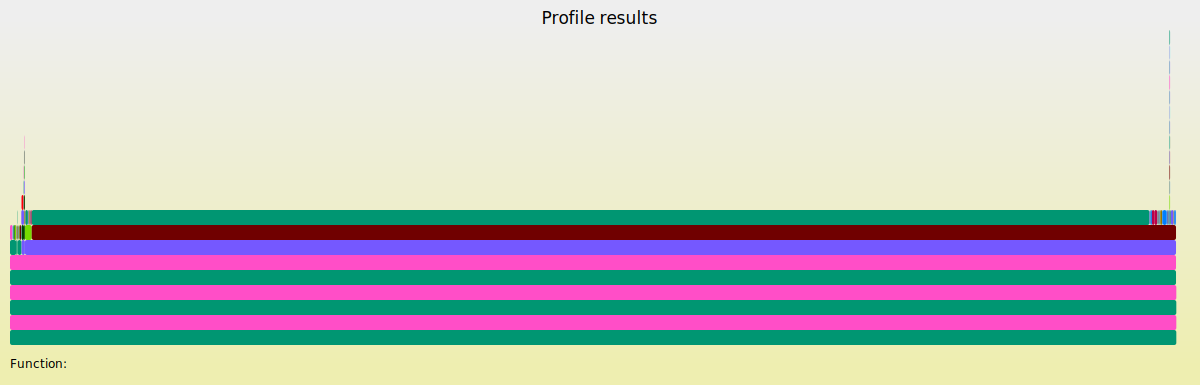

In [131]:
Profile.clear()
i = i + 1
@profile chimera(100000,i);
ProfileView.view()

In [136]:
a1 = grownGraph(1000,2);
@time a11 = productGraph(a1,a1);
nnz(a11)

7952000

3.886340 seconds (61 allocations: 265.612 MB, 91.63% gc time)


In [138]:
@time a11 = productGraph(a1,a1);


  2.283499 seconds (60 allocations: 265.612 MB, 151.86% gc time)


In [141]:
@time a10 = generalizedNecklace(a1,a1,2);

  5.468156 seconds (31.89 k allocations: 320.776 MB, 94.43% gc time)


In [143]:
@time a0 = joinGraphs(a11,a10,100);

  8.682505 seconds (53 allocations: 1.023 GB, 79.51% gc time)


In [150]:
@time (ai,aj,av) = findnz(a11);
n = size(a11)[1]
@time ax = sparse(ai,aj,av,n,n);

  1.814595 seconds (14 allocations: 182.007 MB, 95.28% gc time)
  3.839271 seconds (23 allocations: 280.824 MB, 87.24% gc time)


In [155]:
@time rt = randishKruskal(a11);

 10.901156 seconds (7.95 M allocations: 767.093 MB, 52.49% gc time)


In [156]:
@time rt = randishPrim(a11);

 16.265951 seconds (7.95 M allocations: 1.083 GB, 54.24% gc time)


In [157]:
a = wtedChimera(50);

In [159]:
x = minimum(a.nzval)

0.02186374208034043

In [160]:
a.nzval = a.nzval / x;
minimum(a.nzval)

1.0

In [161]:
n

1000000